## ۱

In [ ]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100, n_features=10, centers=2, random_state=41)

## ۲

In [ ]:
class F:
  @staticmethod
  def sign(x):
    if x < 0:
      return 0
    else:
      return 1

## ۳

In [ ]:
import numpy as np

class Perceptron:
  def __init__(self, input_size):
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn()

  def forward(self, input):
    z = np.dot(self.weights, input) + self.bias
    y = F.sign(z)
    return y

## ۴

In [ ]:
class Optimizer:
  def __init__(self, model):
    self.model = model
  def update(self, x, y, y_hat):
    self.model.weights += (y - y_hat) * x
    self.model.bias += (y - y_hat)

## ۵

In [ ]:
input_size = 10
perceptron = Perceptron(input_size)

optimizer = Optimizer(perceptron)

## ۶

In [ ]:
n_iter = 1000
Y_hat = np.zeros(100)

for _ in range(n_iter):
  n = 0
  for x, y in zip(X, Y):
    y_hat = perceptron.forward(x)
    Y_hat[n] = y_hat
    n += 1
    optimizer.update(x, y, y_hat)

Y_hat

array([1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.])

## ۷

In [ ]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=41)
Y

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
input_size = 2
perceptron = Perceptron(input_size)

optimizer = Optimizer(perceptron)

In [ ]:
n_iter = 1000
Y_hat = np.zeros(100)

for _ in range(n_iter):
  n = 0
  for x, y in zip(X, Y):
    y_hat = perceptron.forward(x)
    Y_hat[n] = y_hat
    n += 1
    optimizer.update(x, y, y_hat)

W1 = perceptron.weights[0]
W2 = perceptron.weights[1]
B = perceptron.bias

Y_hat, perceptron.weights, W1, W2, perceptron.bias, B

(array([1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
        1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.]),
 array([ 8.21468396, -1.76989172]),
 8.214683960756075,
 -1.7698917188453223,
 1.297756664683659,
 1.297756664683659)

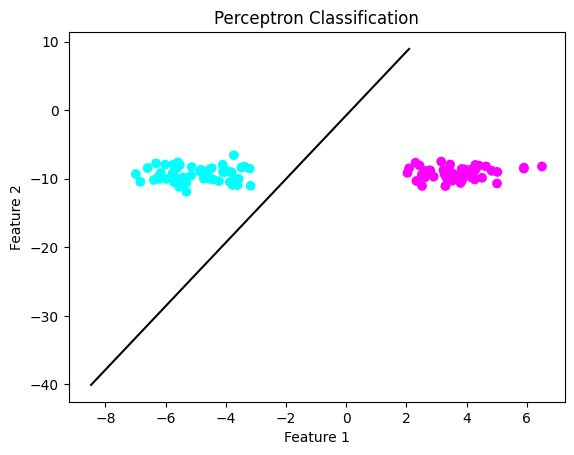

In [ ]:
import matplotlib.pyplot as plt

# Plot the data points and the separating line
plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='cool')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(y_min, y_max, 100)
XX, YY = np.meshgrid(xx, yy)
Z = np.zeros_like(XX)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = perceptron.forward([XX[i, j], YY[i, j]])

# Add the line
x_line = np.linspace(min(x), max(x), 5)
y_line = (B - W1 * x_line) / W2
plt.plot(x_line, y_line, color='black', label='Hyperplane')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Classification')
plt.show()